# CASE STUDY: IRIS PLANT CLASSIFICATION USING K-NEAREST NEIGHBORS





# STEP #0: PROBLEM STATEMENT

The data set contains 3 classes of 50 instances each, where each class refers to a type of iris plant. The attribute to be predicted is the class of iris plant. The classes are as follows: 1. Iris Setosa, 2. Iris Versicolour, 3. Iris Virginica

There are 4 features:
1. sepalLength: sepal length in cm
2. sepalWidth: sepal width in cm
3. petalLength: petal length in cm
4. petalWidth: petal width in cm

There are 3 classes represneting class label of iris flower {1,2,3}
1. Iris Setosa
2. Iris Versicolour
3. Iris Virginica




# STEP #1: IMPORTING DATA

In [85]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [5]:
df = pd.read_csv('iris.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


# STEP #2: EXPLORING THE DATASET  

In [6]:
# Let's view the head of the training dataset
df.head(6)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa


In [7]:
# Let's view the last elements in the training dataset
df.tail(5)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


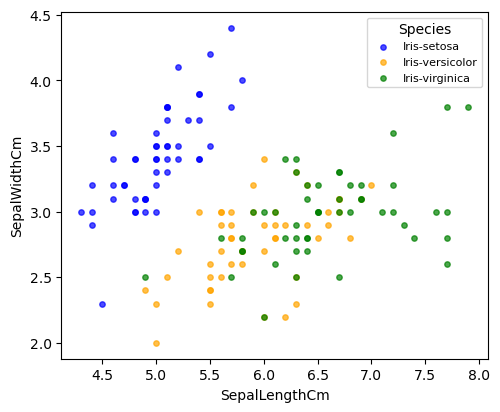

In [51]:
#size
plt.figure(figsize=(5.5, 4.5))
# Create a color map for the species
color_map = {'Iris-setosa': 'blue', 'Iris-versicolor': 'orange', 'Iris-virginica': 'green'}

# Create scatter plots for each species
for species, color in color_map.items():
    plt.scatter(df[df['Species'] == species]['SepalLengthCm'],
                df[df['Species'] == species]['SepalWidthCm'],
                label=species, c=color, s=15, alpha=0.7)

# Add Legend
plt.legend(title='Species', prop={'size': 8})

# Add labels and title
plt.xlabel('SepalLengthCm')
plt.ylabel('SepalWidthCm')


plt.show()

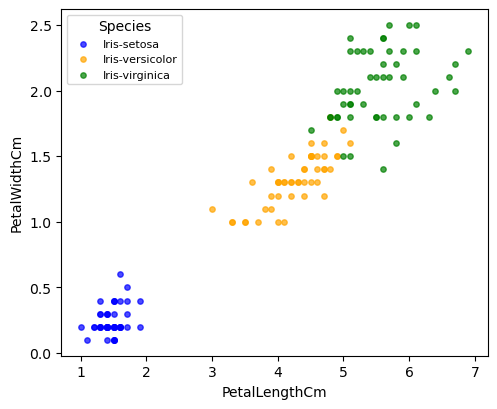

In [54]:
#size
plt.figure(figsize=(5.5, 4.5))
# Create a color map for the species
color_map = {'Iris-setosa': 'blue', 'Iris-versicolor': 'orange', 'Iris-virginica': 'green'}

# Create scatter plots for each species
for species, color in color_map.items():
    plt.scatter(df[df['Species'] == species]['PetalLengthCm'],
                df[df['Species'] == species]['PetalWidthCm'],
                label=species, c=color, s=15, alpha=0.7)

# Add Legend
plt.legend(title='Species', prop={'size': 8})

# Add labels and title
plt.xlabel('PetalLengthCm')
plt.ylabel('PetalWidthCm')


plt.show()

<Figure size 1000x800 with 0 Axes>

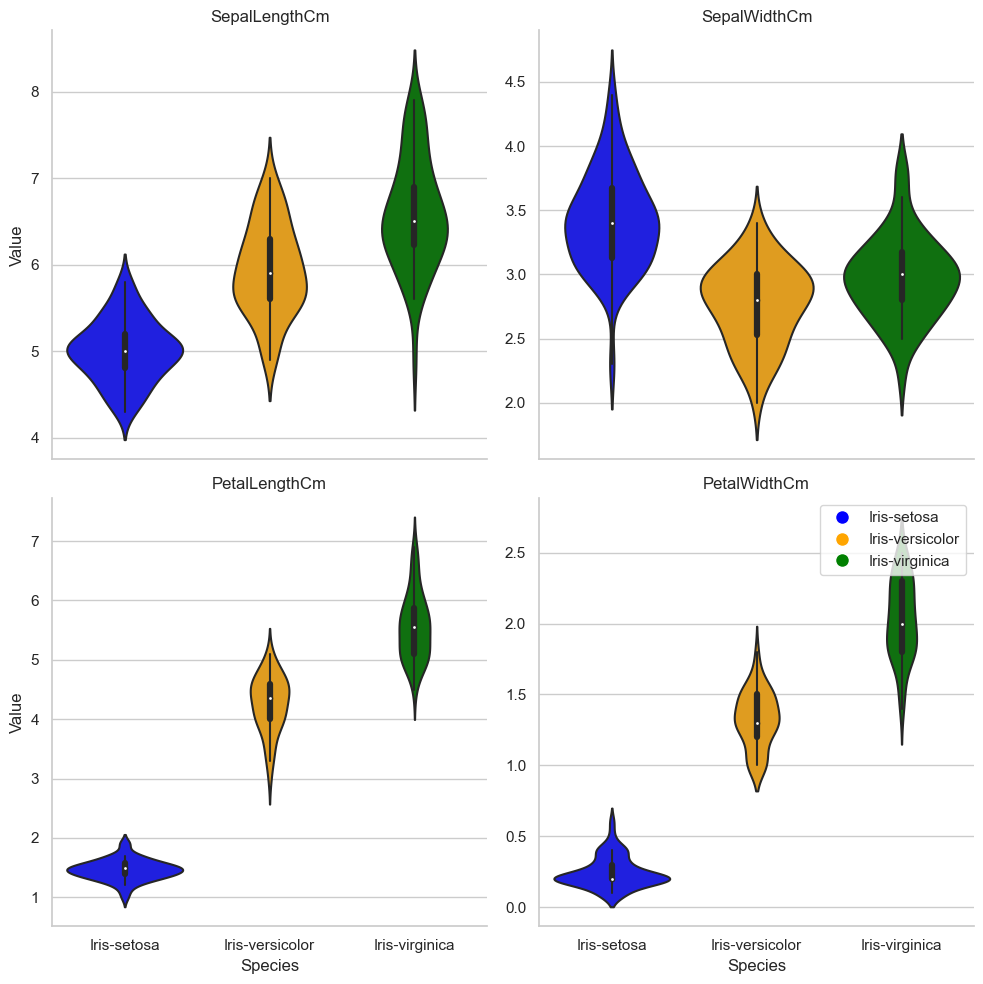

In [68]:
# Let's show the Violin plot
# Melt the DataFrame to a long format
df_melted = pd.melt(df, id_vars="Species", value_vars=['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'])

# Set the style for the plot
sns.set(style="whitegrid")

# Create a facet grid with separate subplots for each feature
plt.figure(figsize=(10, 8))
g = sns.FacetGrid(df_melted, col="variable", col_wrap=2, height=5, sharey=False)

# Explicitly set the order of species
species_order = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

# Create violin plots for each feature
g.map(sns.violinplot, "Species", "value", palette=color_map, order=species_order)

# Add labels and title
g.set_axis_labels("Species", "Value")
g.set_titles(col_template="{col_name}")


# Adjust layout
plt.tight_layout()

# Manually create a common legend outside the FacetGrid
legend_labels = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color_map[label], markersize=10) for label in legend_labels]
plt.legend(handles=handles, labels=legend_labels, loc='upper right')

plt.show()


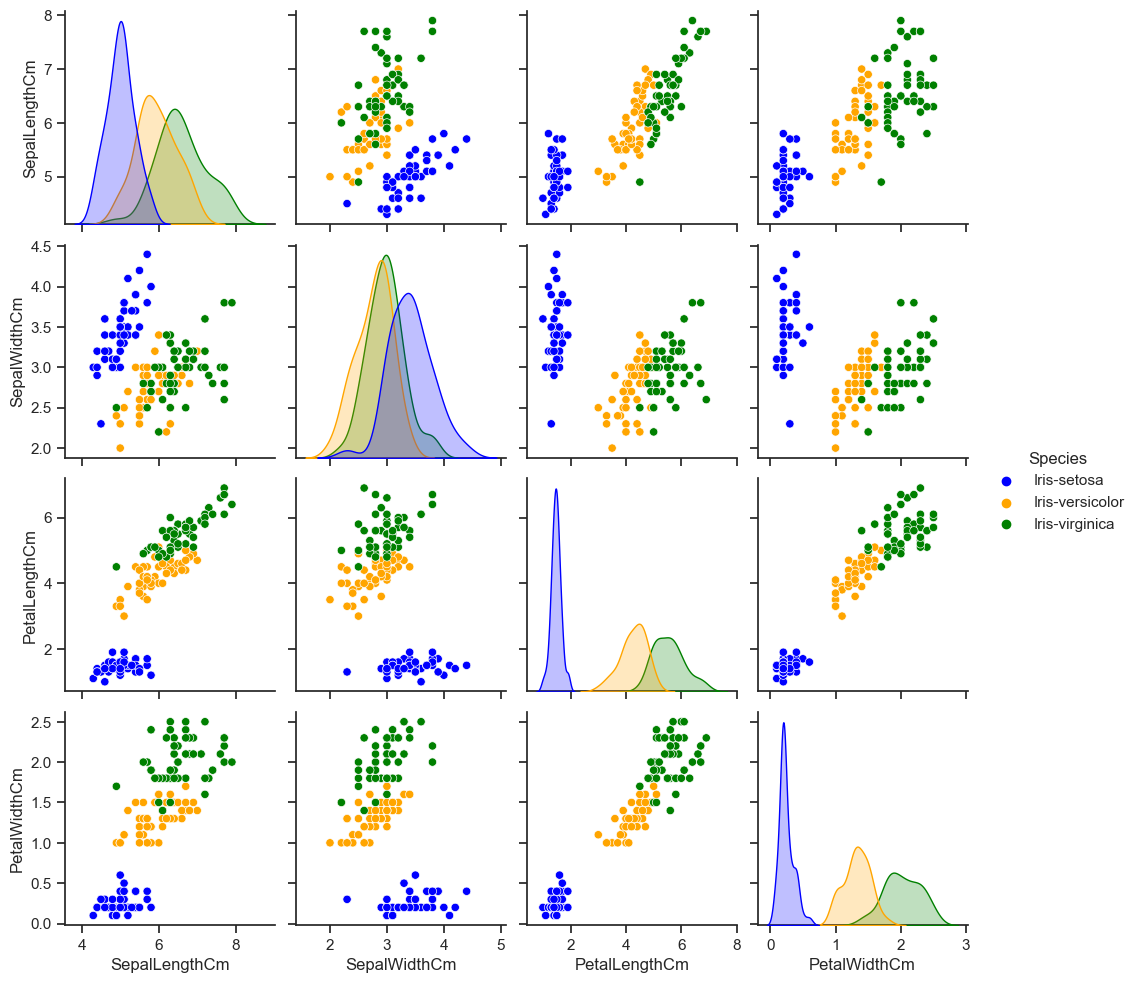

In [70]:
sns.set(style="ticks")
g = sns.pairplot(df, hue="Species", palette=color_map)
plt.show()

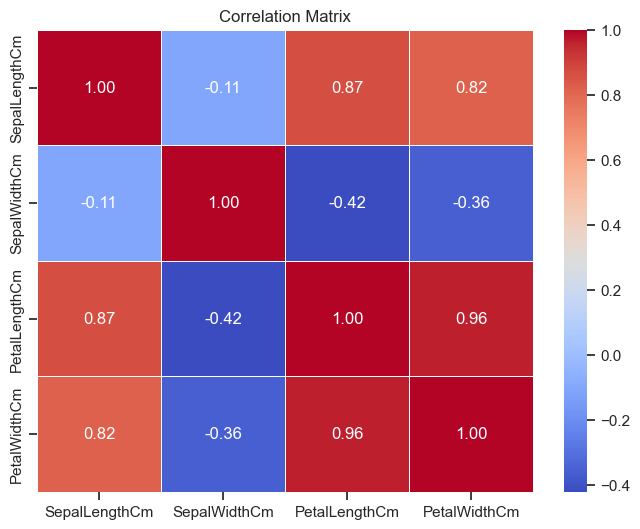

In [72]:
# Let's check the correlation between the variables

# Calculate the correlation matrix
correlation_matrix = df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(8, 6))

# Create a heatmap of the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5)

# Show the plot
plt.title("Correlation Matrix")
plt.show()

# STEP #3: DATA CLEANING

In [79]:
# Let's drop the ID and Species (target label) coloumns
df_cleaned = df.drop(['Species'], axis=1)

# Display the first few rows of the cleaned DataFrame
print(df_cleaned.head(150))

     SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0              5.1           3.5            1.4           0.2
1              4.9           3.0            1.4           0.2
2              4.7           3.2            1.3           0.2
3              4.6           3.1            1.5           0.2
4              5.0           3.6            1.4           0.2
..             ...           ...            ...           ...
145            6.7           3.0            5.2           2.3
146            6.3           2.5            5.0           1.9
147            6.5           3.0            5.2           2.0
148            6.2           3.4            5.4           2.3
149            5.9           3.0            5.1           1.8

[150 rows x 4 columns]


In [81]:
print(df['Species'].head(150))

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: Species, Length: 150, dtype: object


In [82]:
# Import train_test_split from scikit library
from sklearn.model_selection import train_test_split

In [86]:
array_2d = np.random.rand(97, 4)
print(array_2d.shape)

(97, 4)


In [87]:
df1 = df.drop(columns=['Species'])
print(df1)

     SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0              5.1           3.5            1.4           0.2
1              4.9           3.0            1.4           0.2
2              4.7           3.2            1.3           0.2
3              4.6           3.1            1.5           0.2
4              5.0           3.6            1.4           0.2
..             ...           ...            ...           ...
145            6.7           3.0            5.2           2.3
146            6.3           2.5            5.0           1.9
147            6.5           3.0            5.2           2.0
148            6.2           3.4            5.4           2.3
149            5.9           3.0            5.1           1.8

[150 rows x 4 columns]


In [89]:
indices = [106, 94, 14, 60, 49]
df_indices = df1.loc[indices]
print(df_indices)

     SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
106            4.9           2.5            4.5           1.7
94             5.6           2.7            4.2           1.3
14             5.8           4.0            1.2           0.2
60             5.0           2.0            3.5           1.0
49             5.0           3.3            1.4           0.2


In [90]:
# Extract numerical columns for correlation calculation
numerical_columns = df.drop('Species', axis=1)

# Calculate the correlation matrix
correlation_matrix = numerical_columns.corr()

# Display the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

# Display the species information
print("\nSpecies Information:")
print(df['Species'].iloc[:97])

Correlation Matrix:
               SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
SepalLengthCm       1.000000     -0.109369       0.871754      0.817954
SepalWidthCm       -0.109369      1.000000      -0.420516     -0.356544
PetalLengthCm       0.871754     -0.420516       1.000000      0.962757
PetalWidthCm        0.817954     -0.356544       0.962757      1.000000

Species Information:
0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
           ...       
92    Iris-versicolor
93    Iris-versicolor
94    Iris-versicolor
95    Iris-versicolor
96    Iris-versicolor
Name: Species, Length: 97, dtype: object


# STEP #4: TRAINING THE MODEL

In [105]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import pandas as pd

# Create a KNeighborsClassifier instance with specific parameters
knn_classifier = KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski', n_jobs=1, n_neighbors=5, p=2, weights='uniform')

# Train the classifier on the training data
knn_classifier.fit(X_train, y_train)

# Print the parameters of the trained classifier
print(f"KNeighborsClassifier(algorithm='{knn_classifier.algorithm}', leaf_size={knn_classifier.leaf_size}, metric='{knn_classifier.metric}', n_jobs={knn_classifier.n_jobs}, n_neighbors={knn_classifier.n_neighbors}, p={knn_classifier.p}, weights='{knn_classifier.weights}')")

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski', n_jobs=1, n_neighbors=5, p=2, weights='uniform')


In [109]:
# Assuming df is your DataFrame
X = df.drop('Species', axis=1)  # Features
y = df['Species']  # Target variable

# Split the dataset into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [116]:
# Your K-NN classifier code
knn_classifier = KNeighborsClassifier(
    algorithm='auto',
    leaf_size=30,
    metric='minkowski',
    metric_params=None,
    n_jobs=1,
    n_neighbors=3,  
    p=2,
    weights='uniform'
)

knn_classifier.fit(X_train, y_train)
y_pred = knn_classifier.predict(X_test)

# Classification report
from sklearn.metrics import classification_report
class_report = classification_report(y_test, y_pred, target_names=df['Species'].unique())
print(class_report)

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



C:\Users\Admin\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


# STEP #5: EVALUATING THE MODEL

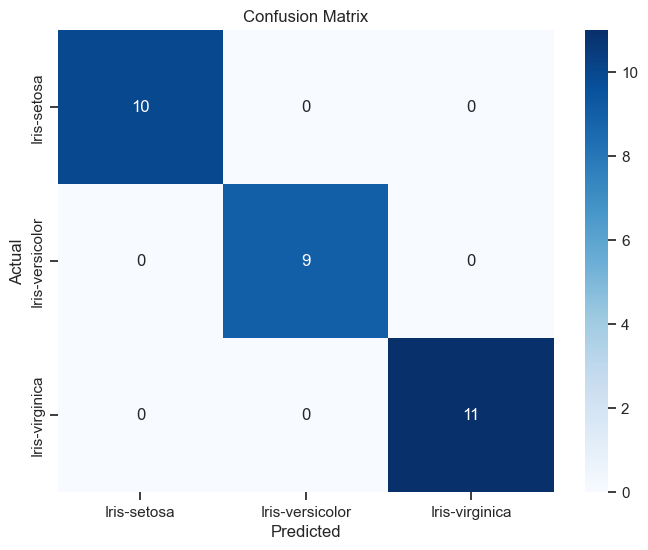

In [111]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Visualize the Confusion Matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=df['Species'].unique(), yticklabels=df['Species'].unique())
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

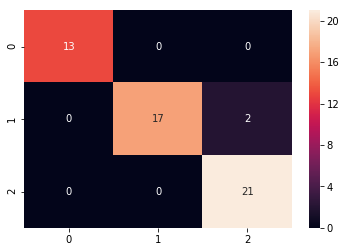

Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



C:\Users\Admin\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


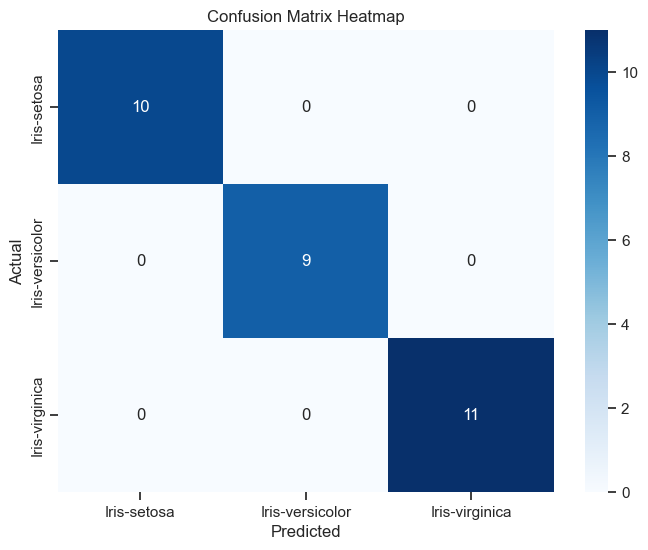

In [113]:
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have trained your classifier and obtained predictions
# Replace knn_classifier with the actual name of your trained classifier
y_pred = knn_classifier.predict(X_test)

# Display the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Display the confusion matrix heatmap
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], yticklabels=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap')
plt.show()

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        13
Iris-versicolor       1.00      0.89      0.94        19
 Iris-virginica       0.91      1.00      0.95        21

    avg / total       0.97      0.96      0.96        53

